In [1]:
# Useful starting lines
#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from proj1_helpers import *
from preprocessing_helpers import *
from Basics import *
#%load_ext autoreload
#%autoreload 2

In [2]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
# split test-train set
indx = np.arange(y.shape[0])
np.random.shuffle( indx )
ind_max = int(y.shape[0] * (0.8))

trainY , trainF = y[indx[:ind_max]] , tX[indx[:ind_max]]
testY , testF = y[indx[ind_max:]] , tX[indx[ind_max:]]

In [4]:
####### Preprocessing ######################################################################

In [5]:
# normalize
trainF , mean , std = standardize(trainF)
trainF = np.insert(trainF ,0 , np.ones(trainF.shape[0]),axis = 1) # add bias
testF = (testF - mean)/std 
testF = np.insert(testF ,0 , np.ones(testF.shape[0]),axis = 1) # add bias

In [6]:
# replace -999
trainF, modes = replace_missing_values(trainF, 'mode')
testF, modes = replace_missing_values(testF,'mode') # replace with the mode of the entire set


In [7]:
# replace outliers
trainF = outliers_removal(trainF)

In [8]:
# dataset balencing
trainF , trainY =  under_over(trainF, trainY, alpha=1, upsample=True, middle=True, gaussian=False, std=0.1, downsample=False)

In [9]:
# feature selection expansion
trainF_sel = select_and_expand_f(trainF)
testF_sel = select_and_expand_f(testF)

In [10]:
###### Training/Testing ######################################################################

In [11]:
w_initial = np.random.rand(trainF_sel.shape[1])

w,_ = least_squares_GD( trainY,trainF_sel ,w_initial,200,0.1)

get_accuracy(w , testY ,testF_sel )

0.46942

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 1/500 [00:00<02:45,  3.02it/s]

  0%|          | 2/500 [00:00<02:32,  3.28it/s]

  1%|          | 3/500 [00:00<02:26,  3.40it/s]

  1%|          | 4/500 [00:01<02:29,  3.33it/s]

  1%|          | 5/500 [00:01<02:29,  3.31it/s]

  1%|          | 6/500 [00:01<02:27,  3.35it/s]

  1%|▏         | 7/500 [00:02<02:26,  3.36it/s]

  2%|▏         | 8/500 [00:02<02:26,  3.35it/s]

  2%|▏         | 9/500 [00:02<02:26,  3.36it/s]

  2%|▏         | 10/500 [00:02<02:26,  3.35it/s]

  2%|▏         | 11/500 [00:03<02:24,  3.40it/s]

  2%|▏         | 12/500 [00:03<02:25,  3.36it/s]

  3%|▎         | 13/500 [00:03<02:24,  3.37it/s]

  3%|▎         | 14/500 [00:04<02:17,  3.54it/s]

  3%|▎         | 15/500 [00:04<02:17,  3.53it/s]

  3%|▎         | 16/500 [00:04<02:27,  3.29it/s]

  3%|▎         | 17/500 [00:05<02:43,  2.95it/s]

  4%|▎         | 18/500 [00:05<02:28,  3.25it/s]

  4%|▍         | 19/500 [00:05<02:25,  3.31it/s]

  4%|▍         | 20/500 [00:05<02:26,  3.27it/s]

  4%|▍         | 21/500 [00:06<02:25,  3.30it/s]

  4%|▍         | 22/500 [00:06<02:20,  3.40it/s]

  5%|▍         | 23/500 [00:06<02:20,  3.40it/s]

  5%|▍         | 24/500 [00:07<02:25,  3.28it/s]

  5%|▌         | 25/500 [00:07<02:21,  3.36it/s]

  5%|▌         | 26/500 [00:07<02:24,  3.29it/s]

  5%|▌         | 27/500 [00:08<02:24,  3.28it/s]

  6%|▌         | 28/500 [00:08<02:20,  3.36it/s]

  6%|▌         | 29/500 [00:08<02:16,  3.44it/s]

  6%|▌         | 30/500 [00:08<02:23,  3.28it/s]

  6%|▌         | 31/500 [00:09<02:25,  3.22it/s]

  6%|▋         | 32/500 [00:09<02:21,  3.30it/s]

  7%|▋         | 33/500 [00:09<02:25,  3.21it/s]

  7%|▋         | 34/500 [00:10<02:18,  3.35it/s]

  7%|▋         | 35/500 [00:10<02:07,  3.64it/s]

  7%|▋         | 36/500 [00:10<02:00,  3.87it/s]

  7%|▋         | 37/500 [00:10<01:54,  4.03it/s]

  8%|▊         | 38/500 [00:11<02:01,  3.79it/s]

  8%|▊         | 39/500 [00:11<02:07,  3.63it/s]

  8%|▊         | 40/500 [00:11<02:08,  3.59it/s]

  8%|▊         | 41/500 [00:12<02:13,  3.43it/s]

  8%|▊         | 42/500 [00:12<02:06,  3.62it/s]

  9%|▊         | 43/500 [00:12<02:08,  3.56it/s]

  9%|▉         | 44/500 [00:12<01:59,  3.81it/s]

  9%|▉         | 45/500 [00:13<02:02,  3.72it/s]

  9%|▉         | 46/500 [00:13<02:00,  3.77it/s]

  9%|▉         | 47/500 [00:13<02:09,  3.49it/s]

 10%|▉         | 48/500 [00:14<02:13,  3.37it/s]

 10%|▉         | 49/500 [00:14<02:33,  2.93it/s]

 10%|█         | 50/500 [00:14<02:26,  3.07it/s]

 10%|█         | 51/500 [00:15<02:22,  3.15it/s]

 10%|█         | 52/500 [00:15<02:20,  3.18it/s]

 11%|█         | 53/500 [00:15<02:18,  3.24it/s]

 11%|█         | 54/500 [00:15<02:13,  3.33it/s]

 11%|█         | 55/500 [00:16<02:12,  3.35it/s]

 11%|█         | 56/500 [00:16<02:12,  3.34it/s]

 11%|█▏        | 57/500 [00:16<02:11,  3.36it/s]

 12%|█▏        | 58/500 [00:17<02:12,  3.34it/s]

 12%|█▏        | 59/500 [00:17<02:06,  3.50it/s]

 12%|█▏        | 60/500 [00:17<02:07,  3.46it/s]

 12%|█▏        | 61/500 [00:17<02:06,  3.46it/s]

 12%|█▏        | 62/500 [00:18<02:07,  3.45it/s]

 13%|█▎        | 63/500 [00:18<02:06,  3.45it/s]

 13%|█▎        | 64/500 [00:18<02:11,  3.32it/s]

 13%|█▎        | 65/500 [00:19<02:23,  3.02it/s]

 13%|█▎        | 66/500 [00:19<02:17,  3.17it/s]

 13%|█▎        | 67/500 [00:19<02:12,  3.26it/s]

 14%|█▎        | 68/500 [00:20<02:12,  3.25it/s]

 14%|█▍        | 69/500 [00:20<02:13,  3.23it/s]

 14%|█▍        | 70/500 [00:20<02:10,  3.29it/s]

 14%|█▍        | 71/500 [00:21<02:11,  3.27it/s]

 14%|█▍        | 72/500 [00:21<02:13,  3.20it/s]

 15%|█▍        | 73/500 [00:21<02:12,  3.21it/s]

 15%|█▍        | 74/500 [00:22<02:15,  3.14it/s]

 15%|█▌        | 75/500 [00:22<02:17,  3.10it/s]

 15%|█▌        | 76/500 [00:22<02:17,  3.08it/s]

 15%|█▌        | 77/500 [00:22<02:11,  3.21it/s]

 16%|█▌        | 78/500 [00:23<02:07,  3.31it/s]

 16%|█▌        | 79/500 [00:23<02:06,  3.32it/s]

 16%|█▌        | 80/500 [00:23<02:04,  3.37it/s]

 16%|█▌        | 81/500 [00:24<02:03,  3.41it/s]

 16%|█▋        | 82/500 [00:24<01:59,  3.50it/s]

 17%|█▋        | 83/500 [00:24<01:57,  3.54it/s]

 17%|█▋        | 84/500 [00:24<01:52,  3.68it/s]

 17%|█▋        | 85/500 [00:25<01:49,  3.79it/s]

 17%|█▋        | 86/500 [00:25<01:52,  3.69it/s]

 17%|█▋        | 87/500 [00:25<01:54,  3.62it/s]

 18%|█▊        | 88/500 [00:26<01:55,  3.57it/s]

 18%|█▊        | 89/500 [00:26<01:46,  3.85it/s]

 18%|█▊        | 90/500 [00:26<01:44,  3.94it/s]

 18%|█▊        | 91/500 [00:26<01:39,  4.10it/s]

 18%|█▊        | 92/500 [00:26<01:40,  4.05it/s]

 19%|█▊        | 93/500 [00:27<01:39,  4.07it/s]

 19%|█▉        | 94/500 [00:27<01:44,  3.90it/s]

 19%|█▉        | 95/500 [00:27<01:43,  3.92it/s]

 19%|█▉        | 96/500 [00:27<01:45,  3.82it/s]

 19%|█▉        | 97/500 [00:28<01:52,  3.59it/s]

 20%|█▉        | 98/500 [00:28<01:53,  3.54it/s]

 20%|█▉        | 99/500 [00:28<01:57,  3.43it/s]

 20%|██        | 100/500 [00:29<01:59,  3.34it/s]

 20%|██        | 101/500 [00:29<02:01,  3.29it/s]

 20%|██        | 102/500 [00:29<02:00,  3.30it/s]

 21%|██        | 103/500 [00:30<02:03,  3.23it/s]

 21%|██        | 104/500 [00:30<02:04,  3.18it/s]

 21%|██        | 105/500 [00:30<02:05,  3.14it/s]

 21%|██        | 106/500 [00:31<02:07,  3.08it/s]

 21%|██▏       | 107/500 [00:31<02:02,  3.20it/s]

 22%|██▏       | 108/500 [00:31<02:03,  3.18it/s]

 22%|██▏       | 109/500 [00:32<02:06,  3.08it/s]

 22%|██▏       | 110/500 [00:32<02:05,  3.10it/s]

 22%|██▏       | 111/500 [00:32<02:05,  3.10it/s]

 22%|██▏       | 112/500 [00:33<02:03,  3.15it/s]

 23%|██▎       | 113/500 [00:33<02:00,  3.21it/s]

 23%|██▎       | 114/500 [00:33<01:57,  3.29it/s]

 23%|██▎       | 115/500 [00:33<01:56,  3.31it/s]

 23%|██▎       | 116/500 [00:34<01:55,  3.32it/s]

 23%|██▎       | 117/500 [00:34<01:57,  3.27it/s]

 24%|██▎       | 118/500 [00:34<01:56,  3.29it/s]

 24%|██▍       | 119/500 [00:35<01:55,  3.29it/s]

 24%|██▍       | 120/500 [00:35<01:53,  3.36it/s]

 24%|██▍       | 121/500 [00:35<01:52,  3.36it/s]

 24%|██▍       | 122/500 [00:36<01:50,  3.42it/s]

 25%|██▍       | 123/500 [00:36<01:50,  3.40it/s]

 25%|██▍       | 124/500 [00:36<01:49,  3.43it/s]

 25%|██▌       | 125/500 [00:36<01:49,  3.41it/s]

 25%|██▌       | 126/500 [00:37<01:49,  3.42it/s]

 25%|██▌       | 127/500 [00:37<01:50,  3.39it/s]

 26%|██▌       | 128/500 [00:37<01:44,  3.56it/s]

 26%|██▌       | 129/500 [00:38<01:43,  3.60it/s]

 26%|██▌       | 130/500 [00:38<01:45,  3.52it/s]

 26%|██▌       | 131/500 [00:38<01:52,  3.28it/s]

 26%|██▋       | 132/500 [00:38<01:52,  3.28it/s]

 27%|██▋       | 133/500 [00:39<01:51,  3.29it/s]

 27%|██▋       | 134/500 [00:39<01:50,  3.30it/s]

 27%|██▋       | 135/500 [00:39<01:51,  3.28it/s]

 27%|██▋       | 136/500 [00:40<01:51,  3.25it/s]

 27%|██▋       | 137/500 [00:40<01:50,  3.29it/s]

 28%|██▊       | 138/500 [00:40<01:57,  3.07it/s]

 28%|██▊       | 139/500 [00:41<01:54,  3.15it/s]

 28%|██▊       | 140/500 [00:41<01:50,  3.25it/s]

 28%|██▊       | 141/500 [00:41<01:49,  3.27it/s]

 28%|██▊       | 142/500 [00:42<01:50,  3.23it/s]

 29%|██▊       | 143/500 [00:42<01:46,  3.34it/s]

 29%|██▉       | 144/500 [00:42<01:43,  3.45it/s]

 29%|██▉       | 145/500 [00:42<01:41,  3.51it/s]

 29%|██▉       | 146/500 [00:43<01:39,  3.56it/s]

 29%|██▉       | 147/500 [00:43<01:37,  3.64it/s]

 30%|██▉       | 148/500 [00:43<01:35,  3.69it/s]

 30%|██▉       | 149/500 [00:43<01:38,  3.57it/s]

 30%|███       | 150/500 [00:44<01:37,  3.59it/s]

 30%|███       | 151/500 [00:44<01:38,  3.55it/s]

 30%|███       | 152/500 [00:44<01:38,  3.54it/s]

 31%|███       | 153/500 [00:45<01:39,  3.48it/s]

 31%|███       | 154/500 [00:45<01:41,  3.40it/s]

 31%|███       | 155/500 [00:45<01:50,  3.12it/s]

 31%|███       | 156/500 [00:46<01:50,  3.10it/s]

 31%|███▏      | 157/500 [00:46<01:48,  3.16it/s]

 32%|███▏      | 158/500 [00:46<01:46,  3.21it/s]

 32%|███▏      | 159/500 [00:47<01:41,  3.36it/s]

 32%|███▏      | 160/500 [00:47<01:42,  3.33it/s]

 32%|███▏      | 161/500 [00:47<01:40,  3.36it/s]

 32%|███▏      | 162/500 [00:47<01:43,  3.26it/s]

 33%|███▎      | 163/500 [00:48<01:44,  3.23it/s]

 33%|███▎      | 164/500 [00:48<01:42,  3.28it/s]

 33%|███▎      | 165/500 [00:48<01:42,  3.28it/s]

 33%|███▎      | 166/500 [00:49<01:40,  3.31it/s]

 33%|███▎      | 167/500 [00:49<01:40,  3.30it/s]

 34%|███▎      | 168/500 [00:49<01:43,  3.22it/s]

 34%|███▍      | 169/500 [00:50<01:41,  3.25it/s]

 34%|███▍      | 170/500 [00:50<01:38,  3.34it/s]

 34%|███▍      | 171/500 [00:50<01:39,  3.31it/s]

 34%|███▍      | 172/500 [00:51<01:45,  3.12it/s]

 35%|███▍      | 173/500 [00:51<01:44,  3.14it/s]

 35%|███▍      | 174/500 [00:51<01:41,  3.22it/s]

 35%|███▌      | 175/500 [00:52<01:50,  2.94it/s]

 35%|███▌      | 176/500 [00:52<01:46,  3.04it/s]

 35%|███▌      | 177/500 [00:52<01:42,  3.15it/s]

 36%|███▌      | 178/500 [00:52<01:39,  3.23it/s]

 36%|███▌      | 179/500 [00:53<01:37,  3.30it/s]

 36%|███▌      | 180/500 [00:53<01:39,  3.21it/s]

 36%|███▌      | 181/500 [00:53<01:39,  3.19it/s]

 36%|███▋      | 182/500 [00:54<01:40,  3.16it/s]

 37%|███▋      | 183/500 [00:54<01:44,  3.04it/s]

 37%|███▋      | 184/500 [00:54<01:40,  3.15it/s]

 37%|███▋      | 185/500 [00:55<01:38,  3.20it/s]

 37%|███▋      | 186/500 [00:55<01:35,  3.28it/s]

 37%|███▋      | 187/500 [00:55<01:35,  3.27it/s]

 38%|███▊      | 188/500 [00:56<01:36,  3.23it/s]

 38%|███▊      | 189/500 [00:56<01:34,  3.30it/s]

 38%|███▊      | 190/500 [00:56<01:35,  3.25it/s]

 38%|███▊      | 191/500 [00:56<01:36,  3.22it/s]

 38%|███▊      | 192/500 [00:57<01:31,  3.37it/s]

 39%|███▊      | 193/500 [00:57<01:29,  3.45it/s]

 39%|███▉      | 194/500 [00:57<01:32,  3.31it/s]

 39%|███▉      | 195/500 [00:58<01:27,  3.50it/s]

 39%|███▉      | 196/500 [00:58<01:24,  3.60it/s]

 39%|███▉      | 197/500 [00:58<01:21,  3.73it/s]

 40%|███▉      | 198/500 [00:58<01:23,  3.63it/s]

 40%|███▉      | 199/500 [00:59<01:23,  3.59it/s]

 40%|████      | 200/500 [00:59<01:27,  3.42it/s]

 40%|████      | 201/500 [00:59<01:29,  3.34it/s]


gamma=0.06300000000000001


 40%|████      | 202/500 [01:00<01:30,  3.28it/s]

 41%|████      | 203/500 [01:00<01:29,  3.31it/s]

 41%|████      | 204/500 [01:00<01:27,  3.38it/s]

 41%|████      | 205/500 [01:01<01:31,  3.24it/s]

 41%|████      | 206/500 [01:01<01:29,  3.29it/s]

 41%|████▏     | 207/500 [01:01<01:31,  3.21it/s]

 42%|████▏     | 208/500 [01:01<01:30,  3.23it/s]

 42%|████▏     | 209/500 [01:02<01:29,  3.24it/s]

 42%|████▏     | 210/500 [01:02<01:28,  3.28it/s]

 42%|████▏     | 211/500 [01:02<01:24,  3.43it/s]

 42%|████▏     | 212/500 [01:03<01:24,  3.39it/s]

 43%|████▎     | 213/500 [01:03<01:24,  3.39it/s]

 43%|████▎     | 214/500 [01:03<01:20,  3.54it/s]

 43%|████▎     | 215/500 [01:03<01:19,  3.57it/s]

 43%|████▎     | 216/500 [01:04<01:20,  3.55it/s]

 43%|████▎     | 217/500 [01:04<01:18,  3.62it/s]

 44%|████▎     | 218/500 [01:04<01:18,  3.59it/s]

 44%|████▍     | 219/500 [01:05<01:19,  3.51it/s]

 44%|████▍     | 220/500 [01:05<01:21,  3.46it/s]

 44%|████▍     | 221/500 [01:05<01:17,  3.60it/s]

 44%|████▍     | 222/500 [01:05<01:13,  3.79it/s]

 45%|████▍     | 223/500 [01:06<01:13,  3.75it/s]

 45%|████▍     | 224/500 [01:06<01:10,  3.90it/s]

 45%|████▌     | 225/500 [01:06<01:11,  3.84it/s]

 45%|████▌     | 226/500 [01:06<01:10,  3.89it/s]

 45%|████▌     | 227/500 [01:07<01:10,  3.88it/s]

 46%|████▌     | 228/500 [01:07<01:13,  3.72it/s]

 46%|████▌     | 229/500 [01:07<01:13,  3.67it/s]

 46%|████▌     | 230/500 [01:08<01:13,  3.66it/s]

 46%|████▌     | 231/500 [01:08<01:12,  3.71it/s]

 46%|████▋     | 232/500 [01:08<01:10,  3.79it/s]

 47%|████▋     | 233/500 [01:08<01:12,  3.70it/s]

 47%|████▋     | 234/500 [01:09<01:14,  3.56it/s]

 47%|████▋     | 235/500 [01:09<01:15,  3.49it/s]

 47%|████▋     | 236/500 [01:09<01:10,  3.72it/s]

 47%|████▋     | 237/500 [01:09<01:12,  3.61it/s]

 48%|████▊     | 238/500 [01:10<01:12,  3.60it/s]

 48%|████▊     | 239/500 [01:10<01:08,  3.80it/s]

 48%|████▊     | 240/500 [01:10<01:07,  3.85it/s]

 48%|████▊     | 241/500 [01:11<01:10,  3.66it/s]

 48%|████▊     | 242/500 [01:11<01:14,  3.47it/s]

 49%|████▊     | 243/500 [01:11<01:10,  3.65it/s]

 49%|████▉     | 244/500 [01:11<01:11,  3.57it/s]

 49%|████▉     | 245/500 [01:12<01:07,  3.76it/s]

 49%|████▉     | 246/500 [01:12<01:09,  3.65it/s]

 49%|████▉     | 247/500 [01:12<01:04,  3.90it/s]

 50%|████▉     | 248/500 [01:12<01:00,  4.19it/s]

 50%|████▉     | 249/500 [01:13<01:02,  3.99it/s]

 50%|█████     | 250/500 [01:13<00:59,  4.18it/s]

 50%|█████     | 251/500 [01:13<01:07,  3.71it/s]

 50%|█████     | 252/500 [01:13<01:06,  3.72it/s]

 51%|█████     | 253/500 [01:14<01:09,  3.57it/s]

 51%|█████     | 254/500 [01:14<01:03,  3.87it/s]

 51%|█████     | 255/500 [01:14<01:02,  3.94it/s]

 51%|█████     | 256/500 [01:14<00:58,  4.19it/s]

 51%|█████▏    | 257/500 [01:15<00:55,  4.34it/s]

 52%|█████▏    | 258/500 [01:15<00:57,  4.18it/s]

 52%|█████▏    | 259/500 [01:15<01:00,  3.96it/s]

 52%|█████▏    | 260/500 [01:15<01:04,  3.73it/s]

 52%|█████▏    | 261/500 [01:16<01:08,  3.51it/s]

 52%|█████▏    | 262/500 [01:16<01:06,  3.60it/s]

 53%|█████▎    | 263/500 [01:16<01:04,  3.65it/s]

 53%|█████▎    | 264/500 [01:17<01:06,  3.57it/s]

 53%|█████▎    | 265/500 [01:17<01:08,  3.43it/s]

 53%|█████▎    | 266/500 [01:17<01:09,  3.39it/s]

 53%|█████▎    | 267/500 [01:17<01:08,  3.41it/s]

 54%|█████▎    | 268/500 [01:18<01:09,  3.35it/s]

 54%|█████▍    | 269/500 [01:18<01:09,  3.34it/s]

 54%|█████▍    | 270/500 [01:18<01:07,  3.40it/s]

 54%|█████▍    | 271/500 [01:19<01:09,  3.29it/s]

 54%|█████▍    | 272/500 [01:19<01:09,  3.28it/s]

 55%|█████▍    | 273/500 [01:19<01:10,  3.20it/s]

 55%|█████▍    | 274/500 [01:20<01:11,  3.17it/s]

 55%|█████▌    | 275/500 [01:20<01:09,  3.24it/s]

 55%|█████▌    | 276/500 [01:20<01:10,  3.19it/s]

 55%|█████▌    | 277/500 [01:21<01:12,  3.06it/s]

 56%|█████▌    | 278/500 [01:21<01:11,  3.09it/s]

 56%|█████▌    | 279/500 [01:21<01:11,  3.07it/s]

 56%|█████▌    | 280/500 [01:22<01:09,  3.19it/s]

 56%|█████▌    | 281/500 [01:22<01:06,  3.28it/s]

 56%|█████▋    | 282/500 [01:22<01:06,  3.28it/s]

 57%|█████▋    | 283/500 [01:23<01:07,  3.20it/s]

 57%|█████▋    | 284/500 [01:23<01:06,  3.24it/s]

 57%|█████▋    | 285/500 [01:23<01:09,  3.10it/s]

 57%|█████▋    | 286/500 [01:24<01:14,  2.87it/s]

 57%|█████▋    | 287/500 [01:24<01:19,  2.67it/s]

 58%|█████▊    | 288/500 [01:24<01:13,  2.89it/s]

 58%|█████▊    | 289/500 [01:24<01:03,  3.31it/s]

 58%|█████▊    | 290/500 [01:25<01:01,  3.39it/s]

 58%|█████▊    | 291/500 [01:25<01:09,  3.01it/s]

 58%|█████▊    | 292/500 [01:26<01:08,  3.03it/s]

 59%|█████▊    | 293/500 [01:26<01:04,  3.23it/s]

 59%|█████▉    | 294/500 [01:26<01:03,  3.24it/s]

 59%|█████▉    | 295/500 [01:26<01:04,  3.17it/s]

 59%|█████▉    | 296/500 [01:27<01:03,  3.22it/s]

 59%|█████▉    | 297/500 [01:27<01:01,  3.29it/s]

 60%|█████▉    | 298/500 [01:27<01:00,  3.34it/s]

 60%|█████▉    | 299/500 [01:28<00:58,  3.43it/s]

 60%|██████    | 300/500 [01:28<00:59,  3.38it/s]

 60%|██████    | 301/500 [01:28<01:00,  3.30it/s]

 60%|██████    | 302/500 [01:29<01:04,  3.08it/s]

 61%|██████    | 303/500 [01:29<01:05,  3.00it/s]

 61%|██████    | 304/500 [01:29<01:02,  3.12it/s]

 61%|██████    | 305/500 [01:29<01:00,  3.20it/s]

 61%|██████    | 306/500 [01:30<01:00,  3.19it/s]

 61%|██████▏   | 307/500 [01:30<00:58,  3.29it/s]

 62%|██████▏   | 308/500 [01:30<00:59,  3.24it/s]

 62%|██████▏   | 309/500 [01:31<00:57,  3.34it/s]

 62%|██████▏   | 310/500 [01:31<00:55,  3.42it/s]

 62%|██████▏   | 311/500 [01:31<00:58,  3.23it/s]

 62%|██████▏   | 312/500 [01:32<01:02,  3.01it/s]

 63%|██████▎   | 313/500 [01:32<01:02,  3.01it/s]

 63%|██████▎   | 314/500 [01:32<01:00,  3.10it/s]

 63%|██████▎   | 315/500 [01:33<00:58,  3.14it/s]

 63%|██████▎   | 316/500 [01:33<00:59,  3.12it/s]

 63%|██████▎   | 317/500 [01:33<00:56,  3.24it/s]

 64%|██████▎   | 318/500 [01:34<00:56,  3.21it/s]

 64%|██████▍   | 319/500 [01:34<00:55,  3.26it/s]

 64%|██████▍   | 320/500 [01:34<00:54,  3.28it/s]

 64%|██████▍   | 321/500 [01:34<00:55,  3.20it/s]

 64%|██████▍   | 322/500 [01:35<00:55,  3.22it/s]

 65%|██████▍   | 323/500 [01:35<00:54,  3.25it/s]

 65%|██████▍   | 324/500 [01:35<00:53,  3.28it/s]

 65%|██████▌   | 325/500 [01:36<00:53,  3.29it/s]

 65%|██████▌   | 326/500 [01:36<00:53,  3.23it/s]

 65%|██████▌   | 327/500 [01:36<00:53,  3.22it/s]

 66%|██████▌   | 328/500 [01:37<00:52,  3.26it/s]

 66%|██████▌   | 329/500 [01:37<00:52,  3.26it/s]

 66%|██████▌   | 330/500 [01:37<00:53,  3.20it/s]

 66%|██████▌   | 331/500 [01:38<00:51,  3.26it/s]

 66%|██████▋   | 332/500 [01:38<00:52,  3.18it/s]

 67%|██████▋   | 333/500 [01:38<00:56,  2.98it/s]

 67%|██████▋   | 334/500 [01:39<00:56,  2.95it/s]

 67%|██████▋   | 335/500 [01:39<00:53,  3.06it/s]

 67%|██████▋   | 336/500 [01:39<00:55,  2.96it/s]

 67%|██████▋   | 337/500 [01:40<00:52,  3.12it/s]

 68%|██████▊   | 338/500 [01:40<00:50,  3.21it/s]

 68%|██████▊   | 339/500 [01:40<00:49,  3.23it/s]

 68%|██████▊   | 340/500 [01:40<00:48,  3.27it/s]

 68%|██████▊   | 341/500 [01:41<00:48,  3.30it/s]

 68%|██████▊   | 342/500 [01:41<00:46,  3.41it/s]

 69%|██████▊   | 343/500 [01:41<00:44,  3.54it/s]

 69%|██████▉   | 344/500 [01:42<00:44,  3.52it/s]

 69%|██████▉   | 345/500 [01:42<00:44,  3.50it/s]

 69%|██████▉   | 346/500 [01:42<00:44,  3.49it/s]

 69%|██████▉   | 347/500 [01:42<00:44,  3.40it/s]

 70%|██████▉   | 348/500 [01:43<00:43,  3.47it/s]

 70%|██████▉   | 349/500 [01:43<00:44,  3.38it/s]

 70%|███████   | 350/500 [01:43<00:42,  3.49it/s]

 70%|███████   | 351/500 [01:44<00:42,  3.50it/s]

 70%|███████   | 352/500 [01:44<00:42,  3.47it/s]

 71%|███████   | 353/500 [01:44<00:42,  3.43it/s]

 71%|███████   | 354/500 [01:44<00:42,  3.42it/s]

 71%|███████   | 355/500 [01:45<00:42,  3.41it/s]

 71%|███████   | 356/500 [01:45<00:42,  3.37it/s]

 71%|███████▏  | 357/500 [01:45<00:41,  3.44it/s]

 72%|███████▏  | 358/500 [01:46<00:40,  3.52it/s]

 72%|███████▏  | 359/500 [01:46<00:36,  3.90it/s]

 72%|███████▏  | 360/500 [01:46<00:35,  3.91it/s]

 72%|███████▏  | 361/500 [01:46<00:36,  3.76it/s]

 72%|███████▏  | 362/500 [01:47<00:36,  3.82it/s]

 73%|███████▎  | 363/500 [01:47<00:35,  3.83it/s]

 73%|███████▎  | 364/500 [01:47<00:36,  3.75it/s]

 73%|███████▎  | 365/500 [01:47<00:36,  3.67it/s]

 73%|███████▎  | 366/500 [01:48<00:36,  3.64it/s]

 73%|███████▎  | 367/500 [01:48<00:37,  3.59it/s]

 74%|███████▎  | 368/500 [01:48<00:36,  3.62it/s]

 74%|███████▍  | 369/500 [01:49<00:36,  3.56it/s]

 74%|███████▍  | 370/500 [01:49<00:37,  3.51it/s]

 74%|███████▍  | 371/500 [01:49<00:37,  3.48it/s]

 74%|███████▍  | 372/500 [01:49<00:38,  3.32it/s]

 75%|███████▍  | 373/500 [01:50<00:37,  3.34it/s]

 75%|███████▍  | 374/500 [01:50<00:36,  3.47it/s]

 75%|███████▌  | 375/500 [01:50<00:36,  3.45it/s]

 75%|███████▌  | 376/500 [01:51<00:36,  3.42it/s]

 75%|███████▌  | 377/500 [01:51<00:34,  3.60it/s]

 76%|███████▌  | 378/500 [01:51<00:33,  3.61it/s]

 76%|███████▌  | 379/500 [01:51<00:34,  3.51it/s]

 76%|███████▌  | 380/500 [01:52<00:34,  3.47it/s]

 76%|███████▌  | 381/500 [01:52<00:33,  3.52it/s]

 76%|███████▋  | 382/500 [01:52<00:33,  3.52it/s]

 77%|███████▋  | 383/500 [01:53<00:33,  3.49it/s]

 77%|███████▋  | 384/500 [01:53<00:32,  3.52it/s]

 77%|███████▋  | 385/500 [01:53<00:31,  3.61it/s]

 77%|███████▋  | 386/500 [01:53<00:32,  3.51it/s]

 77%|███████▋  | 387/500 [01:54<00:32,  3.47it/s]

 78%|███████▊  | 388/500 [01:54<00:31,  3.51it/s]

 78%|███████▊  | 389/500 [01:54<00:32,  3.45it/s]

 78%|███████▊  | 390/500 [01:55<00:31,  3.45it/s]

 78%|███████▊  | 391/500 [01:55<00:31,  3.48it/s]

 78%|███████▊  | 392/500 [01:55<00:30,  3.53it/s]

 79%|███████▊  | 393/500 [01:55<00:30,  3.49it/s]

 79%|███████▉  | 394/500 [01:56<00:30,  3.48it/s]

 79%|███████▉  | 395/500 [01:56<00:30,  3.46it/s]

 79%|███████▉  | 396/500 [01:56<00:30,  3.46it/s]

 79%|███████▉  | 397/500 [01:57<00:29,  3.48it/s]

 80%|███████▉  | 398/500 [01:57<00:29,  3.44it/s]

 80%|███████▉  | 399/500 [01:57<00:28,  3.50it/s]

 80%|████████  | 400/500 [01:57<00:28,  3.50it/s]

 80%|████████  | 401/500 [01:58<00:28,  3.52it/s]

 80%|████████  | 402/500 [01:58<00:27,  3.53it/s]

 81%|████████  | 403/500 [01:58<00:28,  3.44it/s]

 81%|████████  | 404/500 [01:59<00:27,  3.49it/s]

 81%|████████  | 405/500 [01:59<00:27,  3.45it/s]

 81%|████████  | 406/500 [01:59<00:27,  3.36it/s]

 81%|████████▏ | 407/500 [02:00<00:27,  3.35it/s]

 82%|████████▏ | 408/500 [02:00<00:27,  3.36it/s]

 82%|████████▏ | 409/500 [02:00<00:26,  3.42it/s]

 82%|████████▏ | 410/500 [02:00<00:25,  3.48it/s]

 82%|████████▏ | 411/500 [02:01<00:25,  3.50it/s]

 82%|████████▏ | 412/500 [02:01<00:25,  3.45it/s]

 83%|████████▎ | 413/500 [02:01<00:25,  3.40it/s]

 83%|████████▎ | 414/500 [02:02<00:24,  3.54it/s]

 83%|████████▎ | 415/500 [02:02<00:22,  3.83it/s]

 83%|████████▎ | 416/500 [02:02<00:21,  3.92it/s]

 83%|████████▎ | 417/500 [02:02<00:19,  4.19it/s]

 84%|████████▎ | 418/500 [02:02<00:18,  4.32it/s]

 84%|████████▍ | 419/500 [02:03<00:18,  4.31it/s]

 84%|████████▍ | 420/500 [02:03<00:20,  3.86it/s]

 84%|████████▍ | 421/500 [02:03<00:22,  3.55it/s]

 84%|████████▍ | 422/500 [02:04<00:21,  3.66it/s]

 85%|████████▍ | 423/500 [02:04<00:20,  3.68it/s]

 85%|████████▍ | 424/500 [02:04<00:21,  3.59it/s]

 85%|████████▌ | 425/500 [02:04<00:21,  3.51it/s]

 85%|████████▌ | 426/500 [02:05<00:20,  3.54it/s]

 85%|████████▌ | 427/500 [02:05<00:20,  3.64it/s]

 86%|████████▌ | 428/500 [02:05<00:19,  3.76it/s]

 86%|████████▌ | 429/500 [02:05<00:18,  3.89it/s]

 86%|████████▌ | 430/500 [02:06<00:18,  3.81it/s]

 86%|████████▌ | 431/500 [02:06<00:17,  3.92it/s]

 86%|████████▋ | 432/500 [02:06<00:18,  3.77it/s]

 87%|████████▋ | 433/500 [02:06<00:17,  3.80it/s]

 87%|████████▋ | 434/500 [02:07<00:17,  3.81it/s]

 87%|████████▋ | 435/500 [02:07<00:17,  3.69it/s]

 87%|████████▋ | 436/500 [02:07<00:17,  3.71it/s]

 87%|████████▋ | 437/500 [02:08<00:17,  3.65it/s]

 88%|████████▊ | 438/500 [02:08<00:17,  3.51it/s]

 88%|████████▊ | 439/500 [02:08<00:17,  3.58it/s]

 88%|████████▊ | 440/500 [02:08<00:16,  3.64it/s]

 88%|████████▊ | 441/500 [02:09<00:16,  3.63it/s]

 88%|████████▊ | 442/500 [02:09<00:16,  3.61it/s]

 89%|████████▊ | 443/500 [02:09<00:15,  3.72it/s]

 89%|████████▉ | 444/500 [02:09<00:14,  3.75it/s]

 89%|████████▉ | 445/500 [02:10<00:13,  4.01it/s]

 89%|████████▉ | 446/500 [02:10<00:13,  4.07it/s]

 89%|████████▉ | 447/500 [02:10<00:12,  4.16it/s]

 90%|████████▉ | 448/500 [02:10<00:12,  4.15it/s]

 90%|████████▉ | 449/500 [02:11<00:12,  3.99it/s]

 90%|█████████ | 450/500 [02:11<00:13,  3.81it/s]

 90%|█████████ | 451/500 [02:11<00:12,  3.82it/s]

 90%|█████████ | 452/500 [02:11<00:12,  3.84it/s]

 91%|█████████ | 453/500 [02:12<00:11,  3.94it/s]

 91%|█████████ | 454/500 [02:12<00:11,  3.87it/s]

 91%|█████████ | 455/500 [02:12<00:12,  3.72it/s]

 91%|█████████ | 456/500 [02:13<00:12,  3.62it/s]

 91%|█████████▏| 457/500 [02:13<00:12,  3.57it/s]

 92%|█████████▏| 458/500 [02:13<00:12,  3.49it/s]

 92%|█████████▏| 459/500 [02:13<00:11,  3.51it/s]

 92%|█████████▏| 460/500 [02:14<00:11,  3.48it/s]

 92%|█████████▏| 461/500 [02:14<00:11,  3.40it/s]

 92%|█████████▏| 462/500 [02:14<00:11,  3.43it/s]

 93%|█████████▎| 463/500 [02:15<00:10,  3.45it/s]

 93%|█████████▎| 464/500 [02:15<00:10,  3.52it/s]

 93%|█████████▎| 465/500 [02:15<00:09,  3.50it/s]

 93%|█████████▎| 466/500 [02:15<00:09,  3.50it/s]

 93%|█████████▎| 467/500 [02:16<00:09,  3.54it/s]

 94%|█████████▎| 468/500 [02:16<00:09,  3.55it/s]

 94%|█████████▍| 469/500 [02:16<00:08,  3.71it/s]

 94%|█████████▍| 470/500 [02:17<00:08,  3.72it/s]

 94%|█████████▍| 471/500 [02:17<00:07,  3.81it/s]

 94%|█████████▍| 472/500 [02:17<00:07,  3.85it/s]

 95%|█████████▍| 473/500 [02:17<00:07,  3.75it/s]

 95%|█████████▍| 474/500 [02:18<00:07,  3.63it/s]

 95%|█████████▌| 475/500 [02:18<00:06,  4.02it/s]

 95%|█████████▌| 476/500 [02:18<00:05,  4.08it/s]

 95%|█████████▌| 477/500 [02:18<00:05,  4.14it/s]

 96%|█████████▌| 478/500 [02:18<00:05,  4.30it/s]

 96%|█████████▌| 479/500 [02:19<00:04,  4.23it/s]

 96%|█████████▌| 480/500 [02:19<00:04,  4.17it/s]

 96%|█████████▌| 481/500 [02:19<00:04,  4.16it/s]

 96%|█████████▋| 482/500 [02:20<00:04,  3.61it/s]

 97%|█████████▋| 483/500 [02:20<00:04,  3.57it/s]

 97%|█████████▋| 484/500 [02:20<00:04,  3.44it/s]

 97%|█████████▋| 485/500 [02:21<00:04,  3.30it/s]

 97%|█████████▋| 486/500 [02:21<00:04,  3.32it/s]

 97%|█████████▋| 487/500 [02:21<00:03,  3.35it/s]

 98%|█████████▊| 488/500 [02:21<00:03,  3.42it/s]

 98%|█████████▊| 489/500 [02:22<00:03,  3.31it/s]

 98%|█████████▊| 490/500 [02:22<00:02,  3.33it/s]

 98%|█████████▊| 491/500 [02:22<00:02,  3.43it/s]

 98%|█████████▊| 492/500 [02:23<00:02,  3.41it/s]

 99%|█████████▊| 493/500 [02:23<00:02,  3.36it/s]

 99%|█████████▉| 494/500 [02:23<00:01,  3.33it/s]

 99%|█████████▉| 495/500 [02:23<00:01,  3.34it/s]

 99%|█████████▉| 496/500 [02:24<00:01,  3.32it/s]

 99%|█████████▉| 497/500 [02:24<00:00,  3.28it/s]

100%|█████████▉| 498/500 [02:24<00:00,  3.29it/s]

100%|█████████▉| 499/500 [02:25<00:00,  3.26it/s]

100%|██████████| 500/500 [02:25<00:00,  3.33it/s]


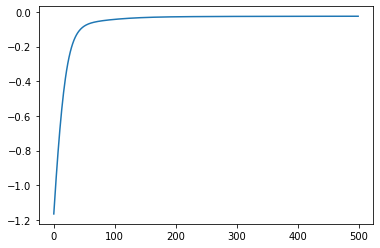

In [13]:
w = np.random.rand(trainF.shape[1])
w, losses, _, _, _, _ = foo_logistic_regression(trainY, trainF, w, 500, 0.07, testY, testF, 0)


plt.plot(range(losses.shape[0]) , losses)